In [17]:
from utils import load_data, default_model, model_fit, find_outliers, plot_date

df = load_data('data/DEOK_hourly.csv', max_lag=1, rolling_mean_size=24)
df.head(10)

,MW,dayofweek,hour,doy,lag_1,rolling_mean
dt,,,,,,
2012-01-02 01:00:00,2836.0,0,1,2,2782.0,2636.250000
2012-01-02 02:00:00,2581.0,0,2,2,2836.0,2648.875000
2012-01-02 03:00:00,2516.0,0,3,2,2581.0,2653.708333
2012-01-02 04:00:00,2520.0,0,4,2,2516.0,2660.041667
2012-01-02 05:00:00,2528.0,0,5,2,2520.0,2668.666667
2012-01-02 06:00:00,2684.0,0,6,2,2528.0,2679.041667
2012-01-02 07:00:00,2737.0,0,7,2,2684.0,2696.333333
2012-01-02 08:00:00,2960.0,0,8,2,2737.0,2714.375000
2012-01-02 09:00:00,3050.0,0,9,2,2960.0,2740.000000


Train MAPE: 0.01408031700295004
Test MAPE: 0.01760573493977445


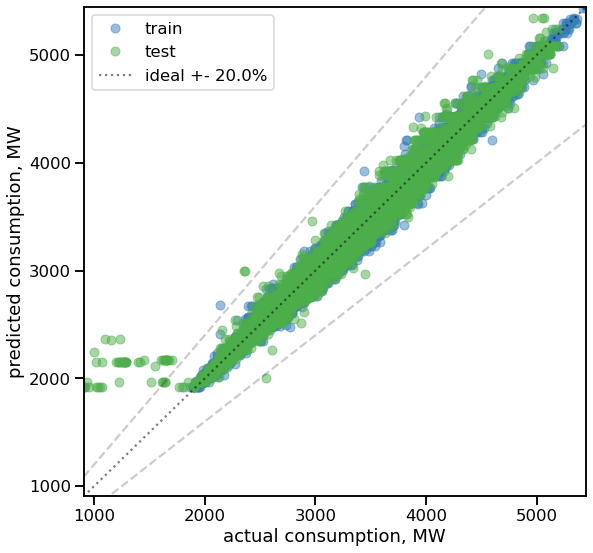

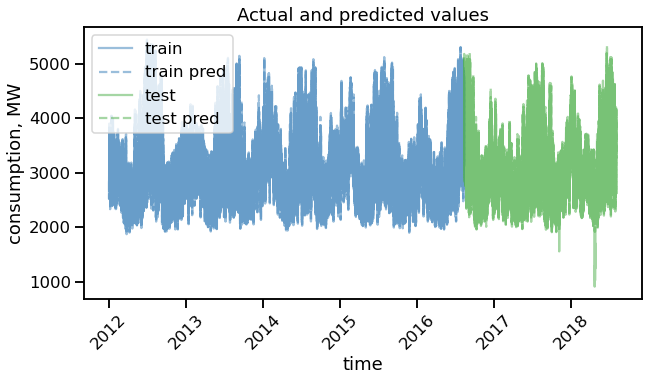

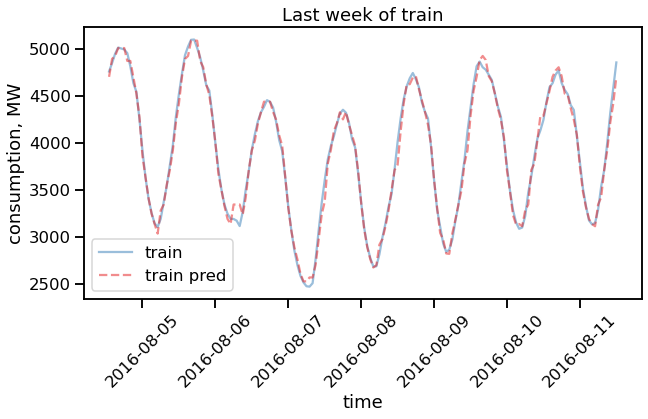

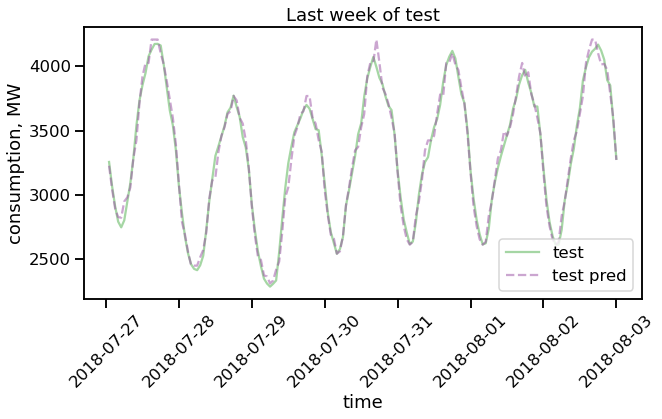

In [18]:
model, df_fit = model_fit(df, default_model,  test_size=0.3, visualize=True, diff_frac = 0.2)

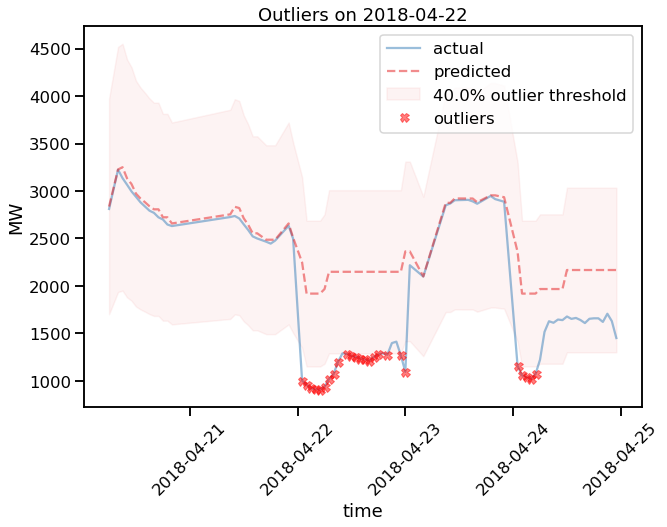

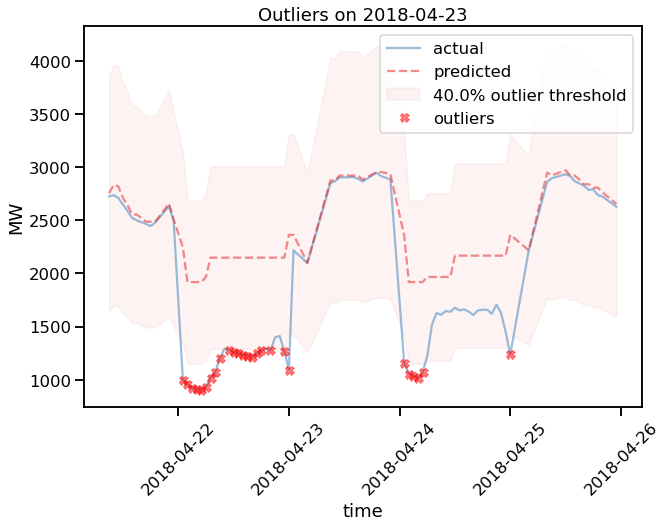

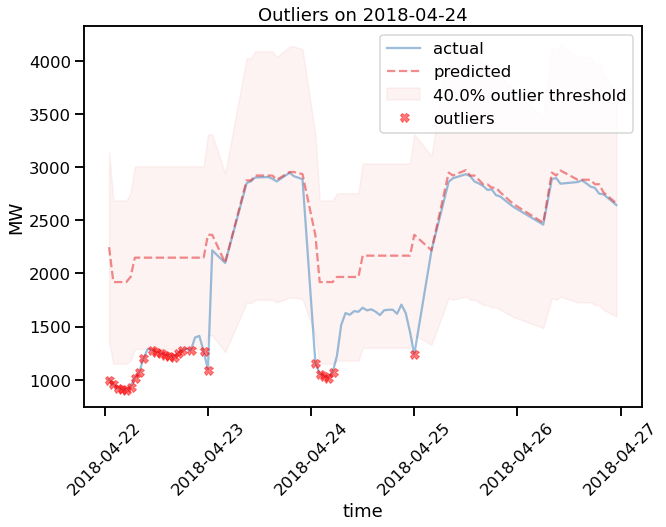

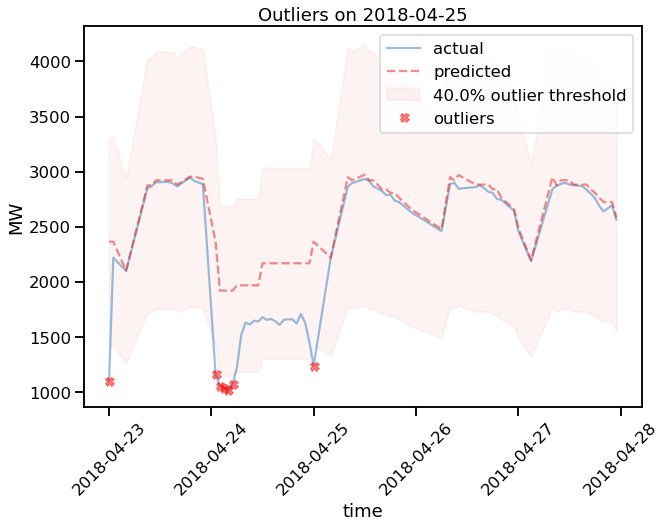

,MW,dayofweek,hour,doy,lag_1,rolling_mean,pred,train,relative_error
dt,,,,,,,,,
2018-04-23 00:00:00,1096.0,0,0,113,1268.0,1219.000000,2363.788571,False,-0.536338
2018-04-24 01:00:00,1158.0,1,1,114,2524.0,2688.625000,2359.185185,False,-0.509153
2018-04-24 02:00:00,1057.0,1,2,114,1158.0,2644.458333,1919.363636,False,-0.449297
2018-04-24 03:00:00,1039.0,1,3,114,1057.0,2599.416667,1919.363636,False,-0.458675
2018-04-24 04:00:00,1020.0,1,4,114,1039.0,2553.750000,1919.363636,False,-0.468574
2018-04-24 05:00:00,1071.0,1,5,114,1020.0,2508.791667,1919.363636,False,-0.442003
2018-04-25 00:00:00,1239.0,2,0,115,1451.0,1531.583333,2363.788571,False,-0.475841


In [21]:
find_outliers(df_fit.query('relative_error<0'), threshold = 0.4)

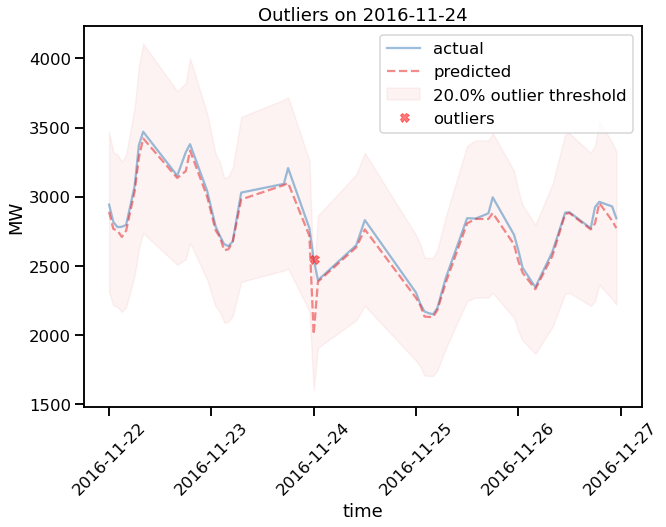

,MW,dayofweek,hour,doy,lag_1,rolling_mean,pred,train,relative_error
dt,,,,,,,,,
2016-11-24,2550.0,3,0,329,2772.0,3009.833333,2006.0,False,0.271186


In [23]:
find_outliers(df_fit.query('relative_error>0'), threshold = 0.2)